## In This Notebook We will analyze the Heart Disease dataset.

- Importing the necessary Packages.

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

- Loading the dataset and printing the shape and the first five rows of the data.

In [46]:
df = pd.read_csv('heart.csv')
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- We have 303 rows and 14 columns
- some columns need to be decoded

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [48]:
df.describe().round()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0,303.0
mean,54.0,1.0,1.0,132.0,246.0,0.0,1.0,150.0,0.0,1.0,1.0,1.0,2.0,1.0
std,9.0,0.0,1.0,18.0,52.0,0.0,1.0,23.0,0.0,1.0,1.0,1.0,1.0,0.0
min,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,48.0,0.0,0.0,120.0,211.0,0.0,0.0,134.0,0.0,0.0,1.0,0.0,2.0,0.0
50%,55.0,1.0,1.0,130.0,240.0,0.0,1.0,153.0,0.0,1.0,1.0,0.0,2.0,1.0
75%,61.0,1.0,2.0,140.0,274.0,0.0,1.0,166.0,1.0,2.0,2.0,1.0,3.0,1.0
max,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.0,2.0,4.0,3.0,1.0


- No null values in the dataset.

In [49]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

- there is only one duplicated row.

In [50]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


- We need to drop the Duplicated rows.

In [51]:
df.drop_duplicates(inplace=True)

- There is Skewness in some columns like (max_hr, st_depr)
- Age can be represented as normally distributed
- rest_bp, chol without the outliers they can be normally distributed.

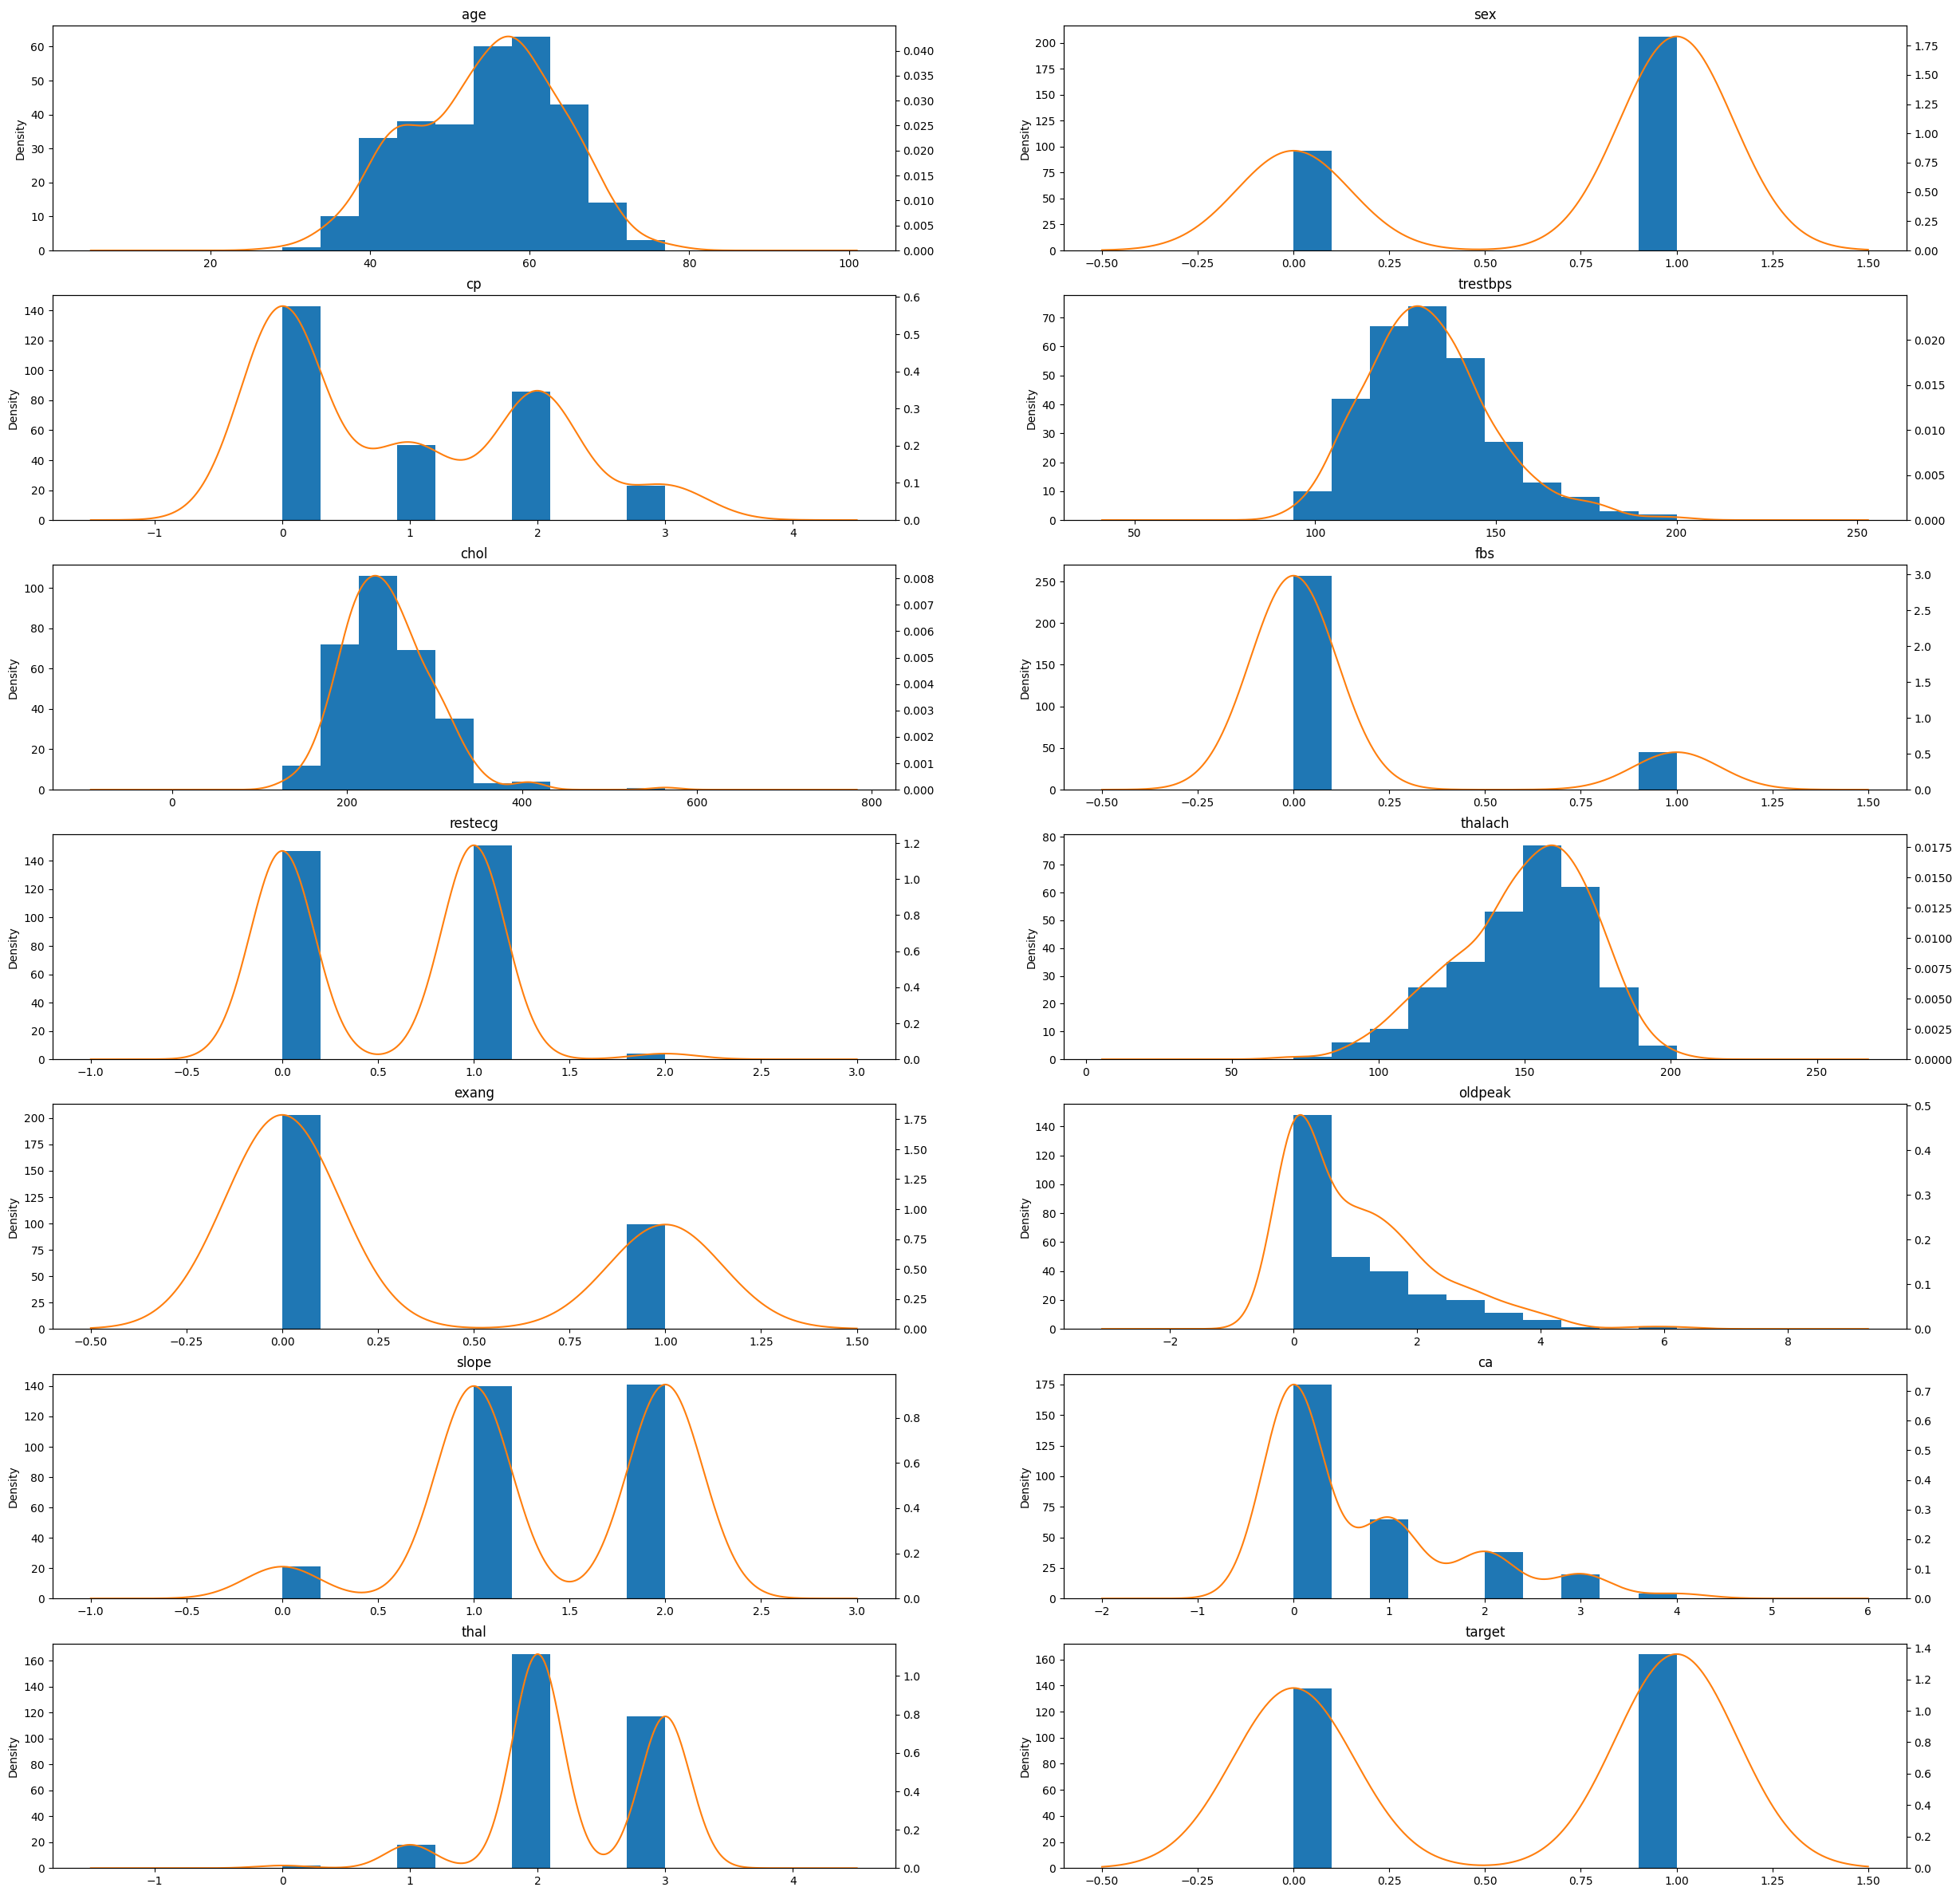

In [52]:
k = len(df.columns)
n = 2
m = (k - 1) // n + 1
fig, axes = plt.subplots(m, n, figsize=(30, 30))
for i, (name, col) in enumerate(df.iteritems()):
    r, c = i // n, i % n
    ax = axes[r, c]
    col.hist(ax=ax)
    ax2 = col.plot.kde(ax=ax, secondary_y=True, title=name)
    ax2.set_ylim(0)
plt.savefig('figs/distribtions of all columns with kde.png', format='png', dpi=300)
plt.show()

- There are some Outliers at columns like (trestbps, chol, thalac, oldpeak, ca, thal)

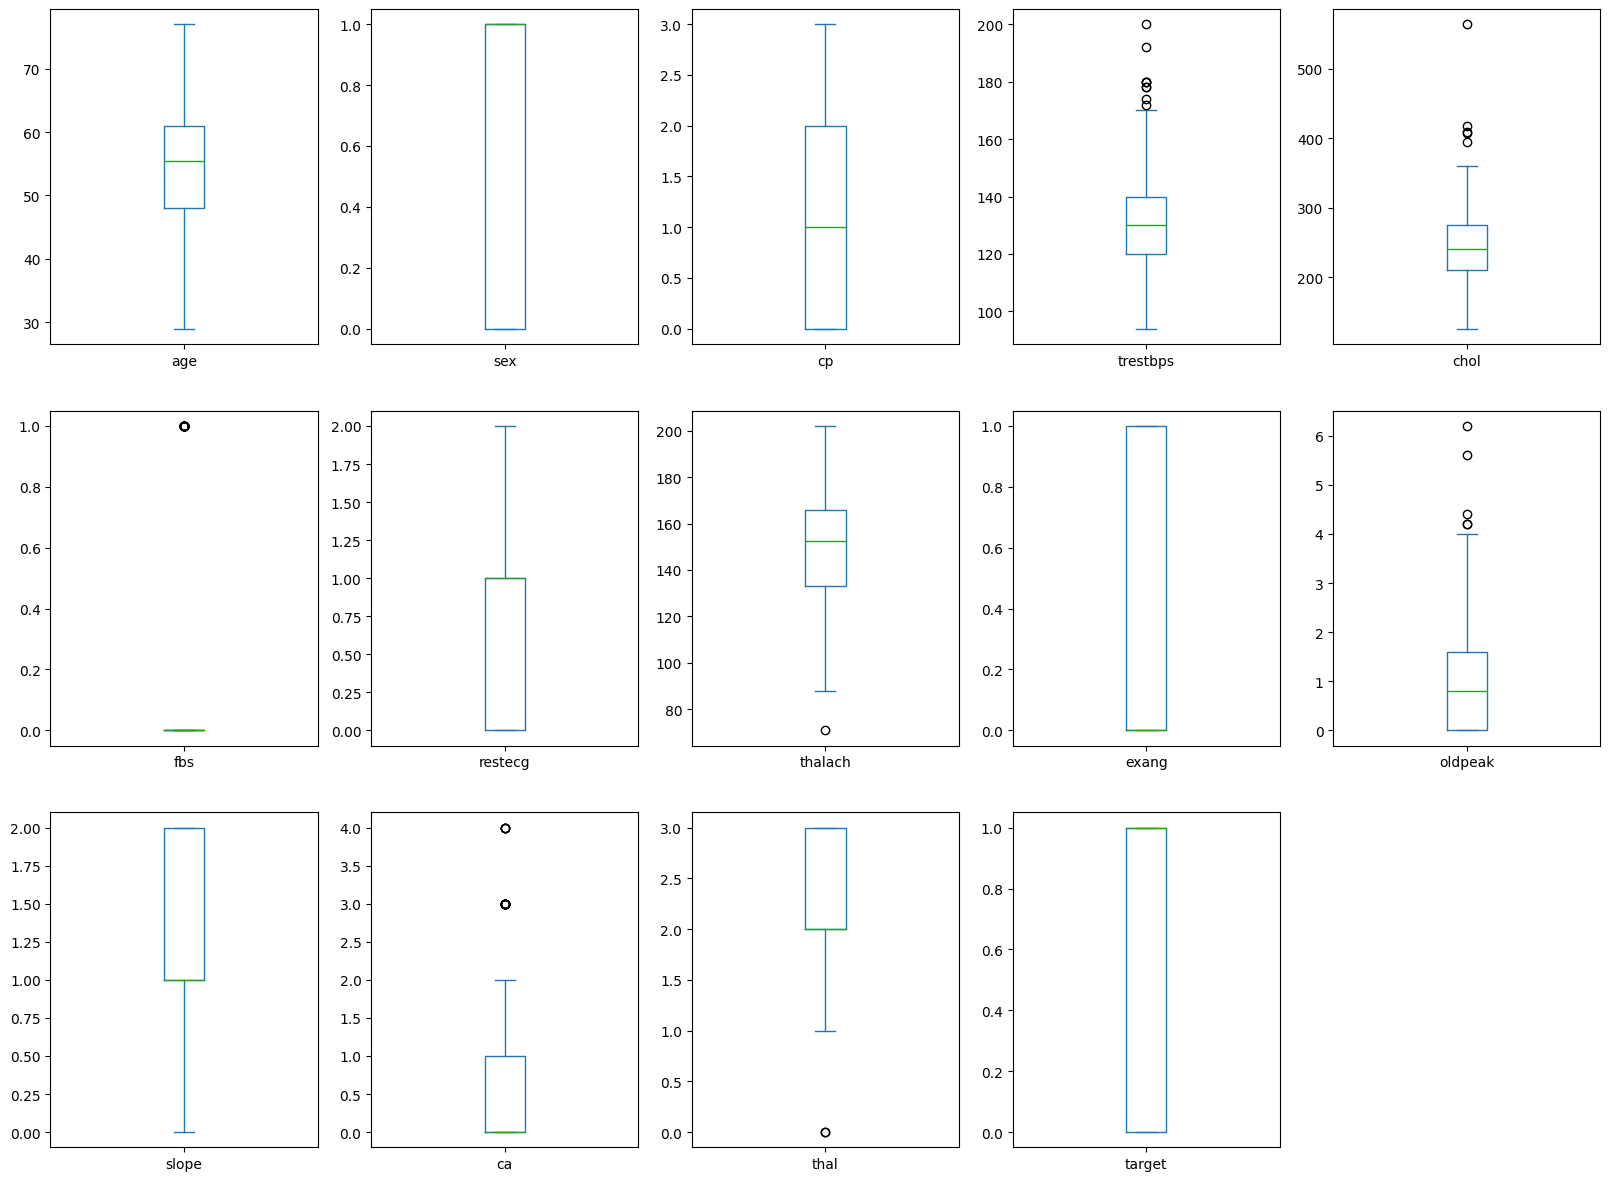

In [53]:
df.plot(kind='box', subplots=True,\
                    sharex=False, sharey=False,\
                    figsize=(20, 20),  layout=(4, 5))
plt.savefig('figs/box plot for all columns.png', format='png', dpi=300)
plt.show()

- Dropping Outliers form the ca column and Dropping the value above 500 in the chol column.

In [54]:
index = df[df['chol'] > 500].index
df.drop(index=index, inplace=True)

- Drop the 0 values in the thalassemia column.

In [55]:
mask = df['thal'] == 0
index = df[mask].index

df.drop(index=index, axis=0, inplace=True)

- Here I will create a new column age_category to categorize the ages of our patients.

In [56]:
def categorize_ages(val):
    if val < 40:
        return 'Young'
    elif val < 60:
        return 'Old'
    else:
        return 'Retired'

df['age_category'] = df['age'].apply(categorize_ages)

#### So now we have a general idea about our dataset, We can now put a solution roadmap to do the analysis.
1. **Preprocessing Phase**
2. **Univariate Analysis**
3. **Bivariate Analysis**
4. **Linear Correlations**

- As a Preprocessing step we need to:
    1. change the names of columns to meaningful ones.
    2. drop duplicated rows
    3. Decode columns. so the analysis makes sense
    4. drop 0 values in the thalassemia column

- Editing the names of the rows. The original names are not so meaningful.

In [57]:
df.rename(index = str, \
          columns = {'cp' : 'chest_pain', \
                     'trestbps' : 'rest_bp', \
                     'fbs' : 'fast_bld_sugar', \
                     'restecg' : 'rest_ecg', \
                     'thalach' : 'max_hr', \
                     'exang' : 'ex_angina', \
                     'oldpeak' : 'st_depr', \
                     'ca' : 'colored_vessels', \
                     'thal' : 'thalassemia', }, inplace = True)

- Decoding columns to give meaningful results in the analysis.

In [58]:
# Define decoding maps for categorical columns
decoding_maps = {
    'sex': {0: 'Female', 1: 'Male'},
    'chest_pain': {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'},
    'fast_bld_sugar': {0: '<= 120 mg/dl', 1: '> 120 mg/dl'},
    'rest_ecg': {0: 'Normal', 1: 'ST-T wave abnormality', 2: 'Left ventricular hypertrophy'},
    'ex_angina': {0: 'No', 1: 'Yes'},
    'slope': {0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'},
    'thalassemia': {1: 'Normal', 2: 'Fixed Defect', 3: 'Reversible Defect'},
    'target': {0: 'No Disease', 1: 'Disease Present'}
}

preprocessed_data = df.copy()
preprocessed_data.replace(decoding_maps, inplace=True)
preprocessed_data.head()

,age,sex,chest_pain,rest_bp,chol,fast_bld_sugar,rest_ecg,max_hr,ex_angina,st_depr,slope,colored_vessels,thalassemia,target,age_category
0,63,Male,Asymptomatic,145,233,> 120 mg/dl,Normal,150,No,2.3,Upsloping,0,Normal,Disease Present,Retired
1,37,Male,Non-Anginal Pain,130,250,<= 120 mg/dl,ST-T wave abnormality,187,No,3.5,Upsloping,0,Fixed Defect,Disease Present,Young
2,41,Female,Atypical Angina,130,204,<= 120 mg/dl,Normal,172,No,1.4,Downsloping,0,Fixed Defect,Disease Present,Old
3,56,Male,Atypical Angina,120,236,<= 120 mg/dl,ST-T wave abnormality,178,No,0.8,Downsloping,0,Fixed Defect,Disease Present,Old
4,57,Female,Typical Angina,120,354,<= 120 mg/dl,ST-T wave abnormality,163,Yes,0.6,Downsloping,0,Fixed Defect,Disease Present,Old


- Saving a copy for further analysis.

In [59]:
preprocessed_data.to_csv('preprocesed heart disease.csv', index=False)

## Univariate Analysis
- sex
- chest pain
- fast blood sugar
- rest ecg
- ex angina
- slope
- colored vessels
- thalassemia
- target


- As we will go through many CountPlots we will define a function for it so we don't repeat ourselves.

In [60]:
def plot_distribution(col, figsize=(12, 6), rotation=0, hue=None, color=None, counts=True):
    if counts:
        print(preprocessed_data[col].value_counts(normalize=True))
    if (len(preprocessed_data[col].unique()) > 2) & (hue == None):
        color = 'steelblue'
    plt.figure(figsize=figsize)
    sns.countplot(data=preprocessed_data,
                  x=col,
                  hue=hue,
                  color=color)
    plt.title(f'Distribution of {col} column')
    plt.xlabel(f'{col}')
    plt.ylabel('Counts')
    plt.xticks(rotation=rotation)
    if hue:
        plt.savefig(f'figs/{col} Counts with {hue} hue.png', format='png')
    
    plt.savefig(f'figs/{col} Counts.png', format='png')
    plt.show()

- 68% of the people are males

Male      0.685619
Female    0.314381
Name: sex, dtype: float64


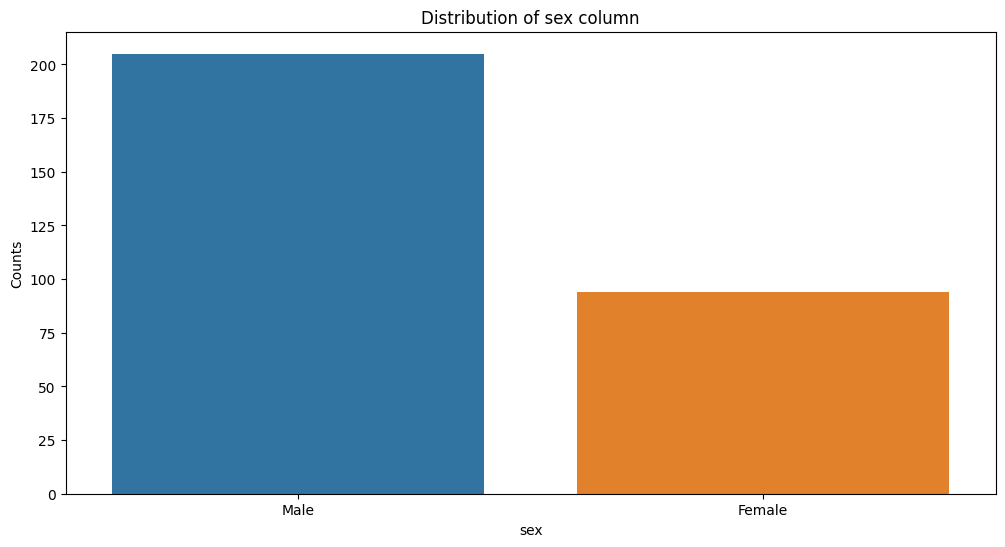

In [61]:
plot_distribution('sex')

- 47% of the people in the dataset have Typical Angina chest pain.

Typical Angina      0.474916
Non-Anginal Pain    0.280936
Atypical Angina     0.167224
Asymptomatic        0.076923
Name: chest_pain, dtype: float64


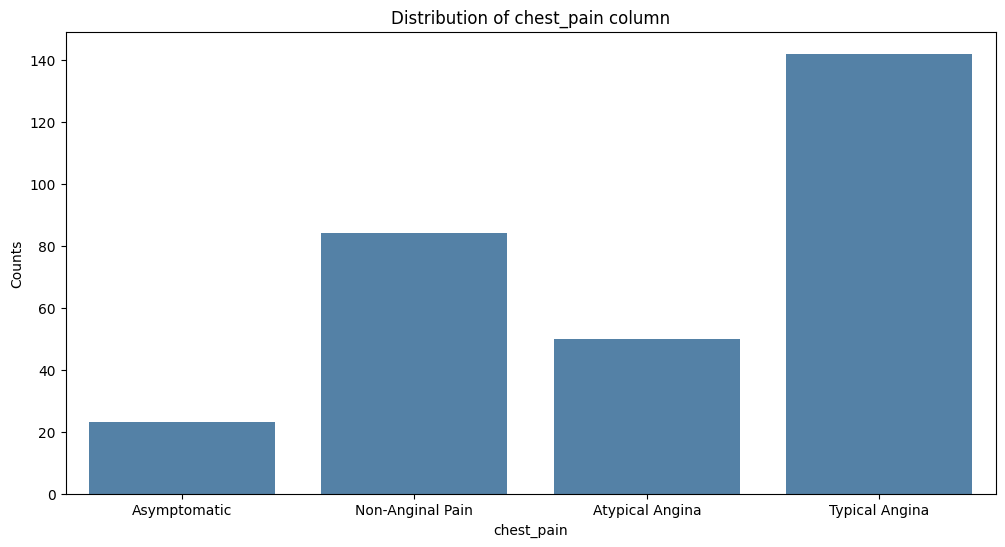

In [62]:
plot_distribution('chest_pain')

- 85% of the people in the dataset have <= 120 mg/dl fast blood sugar.

<= 120 mg/dl    0.852843
> 120 mg/dl     0.147157
Name: fast_bld_sugar, dtype: float64


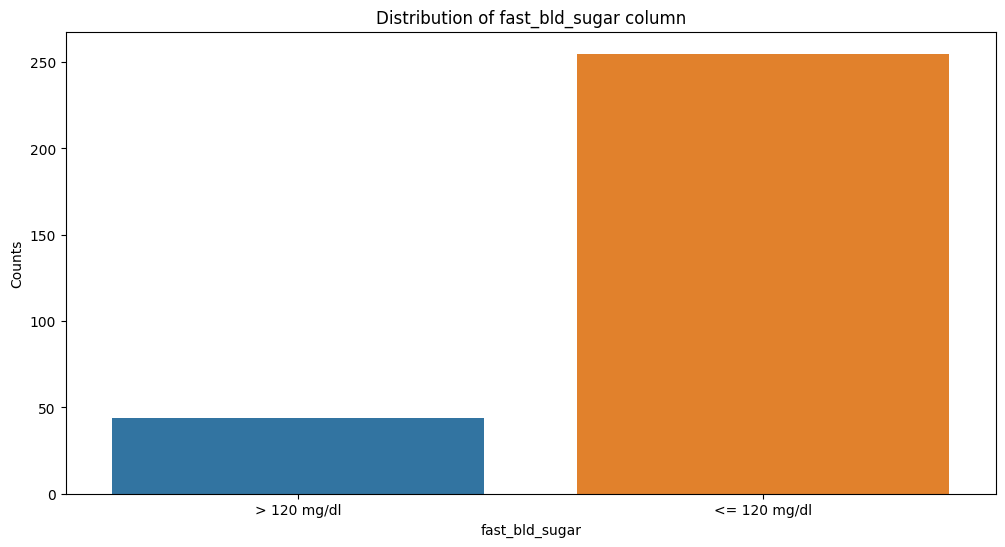

In [63]:
plot_distribution('fast_bld_sugar')

- Majority of the people in the dataset have Resting Electrocardiogram of Normal and ST-T wave abnormality.

ST-T wave abnormality           0.501672
Normal                          0.484950
Left ventricular hypertrophy    0.013378
Name: rest_ecg, dtype: float64


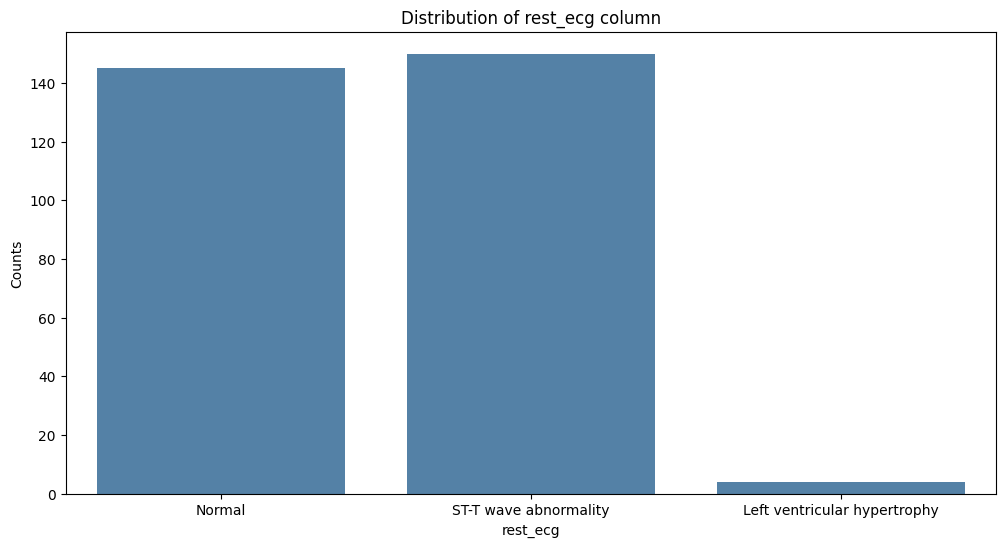

In [64]:
plot_distribution('rest_ecg')

- 67% of the people in our dataset have No exercise-induced angina.

No     0.672241
Yes    0.327759
Name: ex_angina, dtype: float64


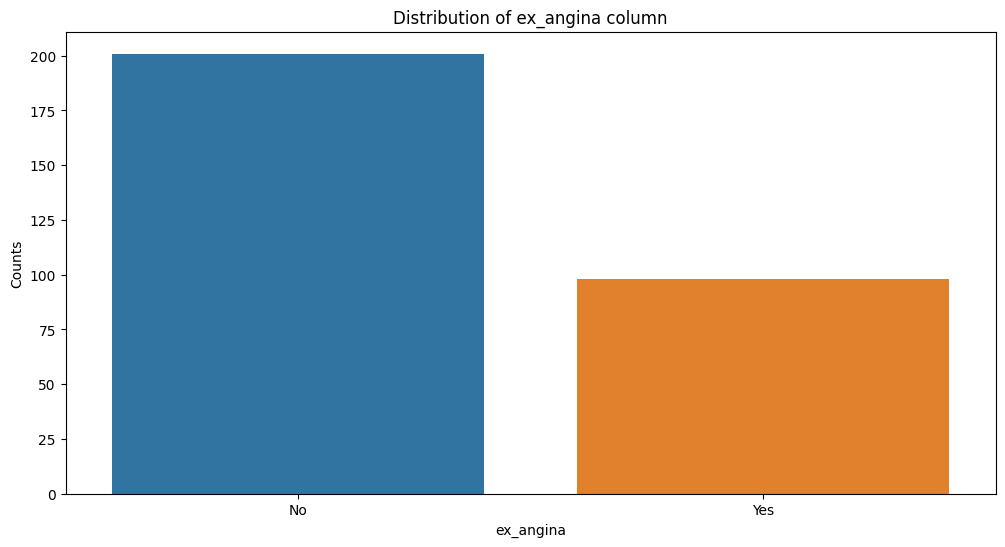

In [65]:
plot_distribution('ex_angina')

- 46% of our people are Downsloping and another 46% are Flat slope (slope of the peak exercise ST segment, ).

Downsloping    0.468227
Flat           0.461538
Upsloping      0.070234
Name: slope, dtype: float64


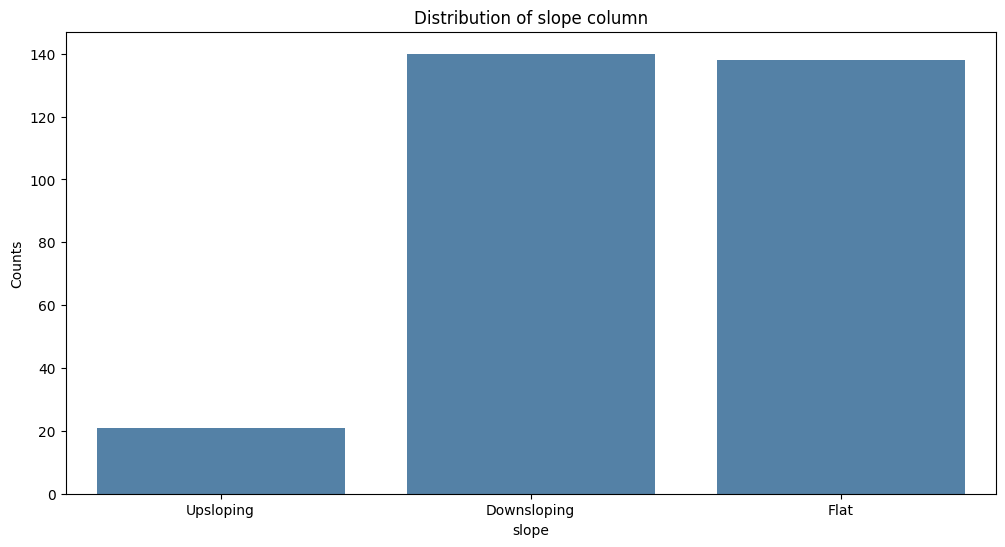

In [66]:
plot_distribution('slope')

- 57% of the people in the dataset  are No major vessels colored.

0    0.575251
1    0.217391
2    0.127090
3    0.066890
4    0.013378
Name: colored_vessels, dtype: float64


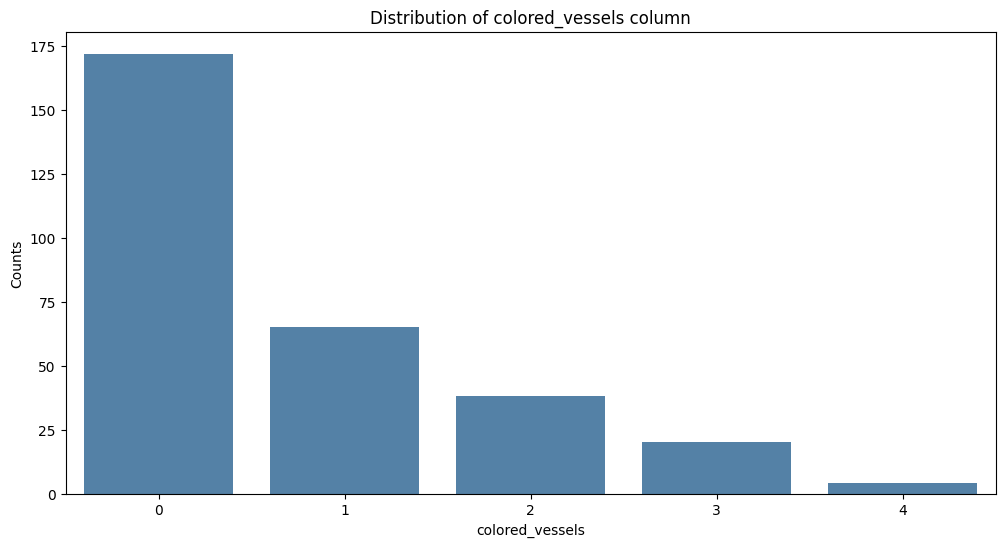

In [67]:
plot_distribution('colored_vessels')

- 54.6% of the people in the dataset have Fixed Defect (presence of heart disease, but no change in thallium uptake)
- 38.7 of the people in the dataset have Reversible Defect (presence of heart disease, with a reversible reduction in thallium uptake)

Fixed Defect         0.551839
Reversible Defect    0.387960
Normal               0.060201
Name: thalassemia, dtype: float64


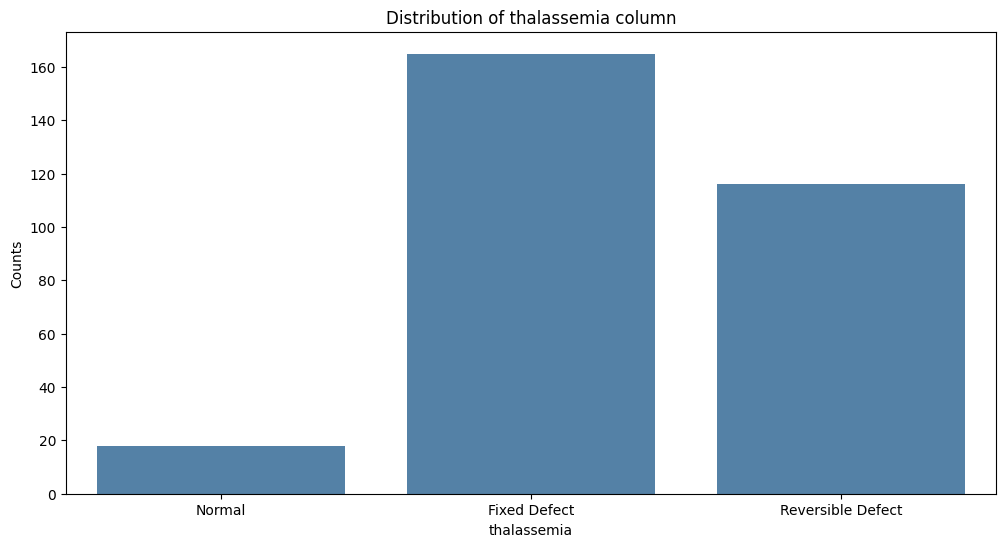

In [68]:
plot_distribution('thalassemia')

- 66.5% of the people in our dataset are Old (40-60).

Old        0.652174
Retired    0.297659
Young      0.050167
Name: age_category, dtype: float64


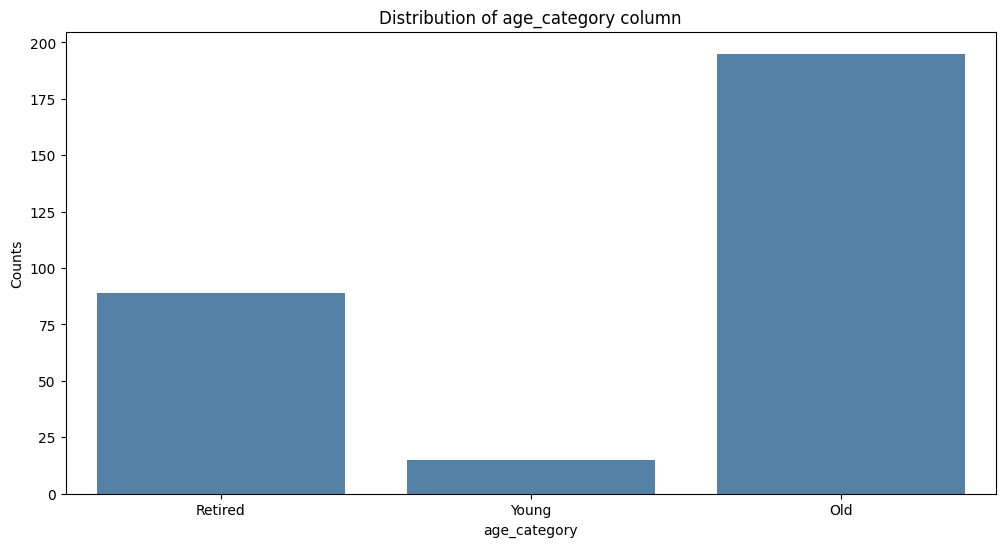

In [69]:
plot_distribution('age_category')

- The data looks almost balanced with 54% to Disease present people and 46% No Disease present.

Disease Present    0.541806
No Disease         0.458194
Name: target, dtype: float64


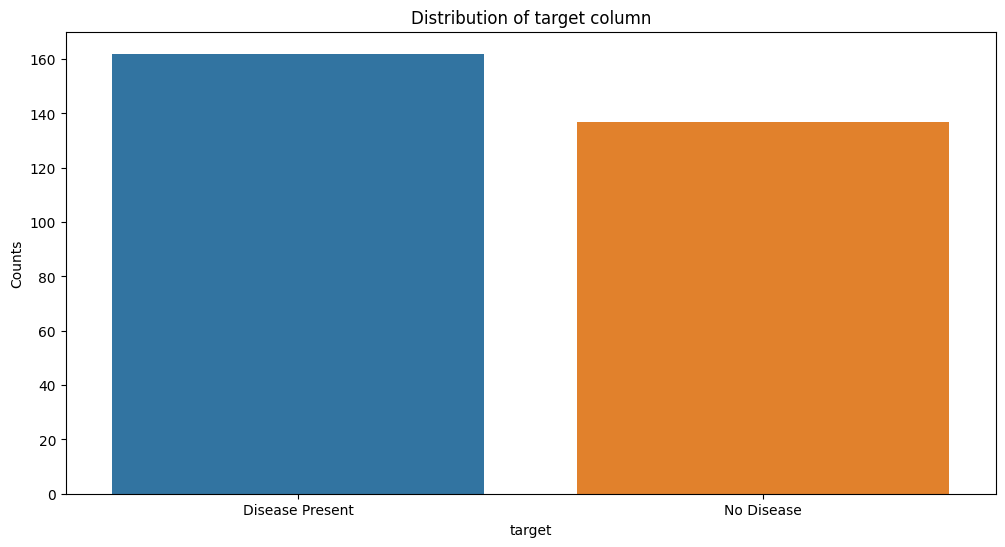

In [70]:
plot_distribution('target')

# --------------------------------------------------------------------------

- Males are more eligible to the disease present than Females.

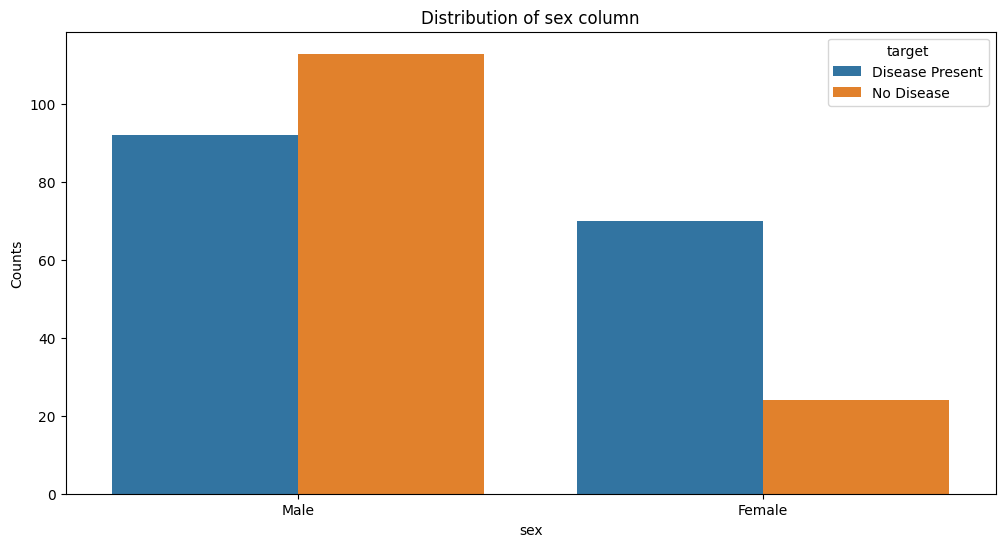

In [71]:
plot_distribution('sex', hue='target', counts=False)

- People with Non-Anginal Pain represent more Disease Present cases.

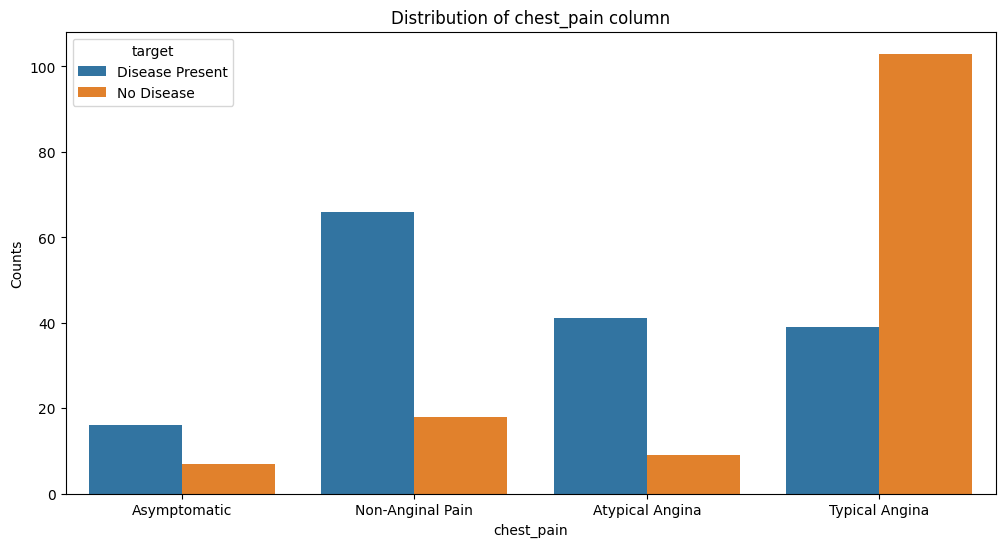

In [72]:
plot_distribution('chest_pain', hue='target', counts=False)

- People with <= 120 mg/dl fast blood sugar represent way more Disease Present cases.

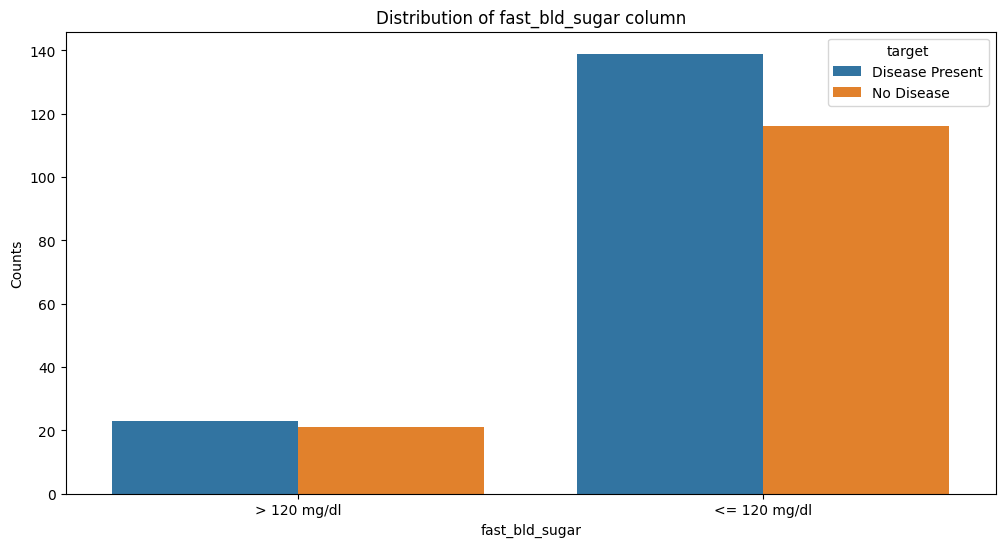

In [73]:
plot_distribution('fast_bld_sugar', hue='target', counts=False)

- ST-T wave abnormality represent more Disease Present cases.

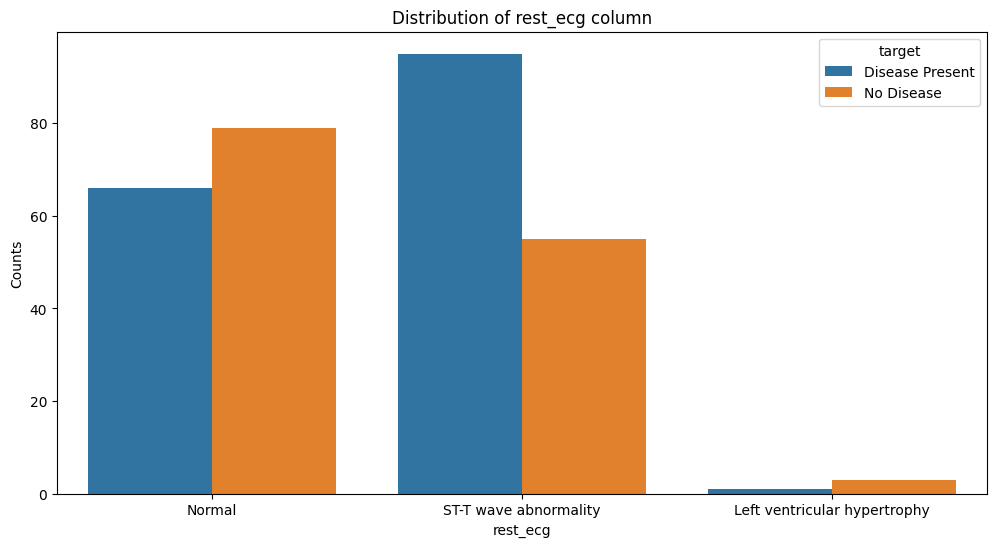

In [74]:
plot_distribution('rest_ecg', hue='target', counts=False)

- people with no exercise-induced angina are more likely to be Disease Present.

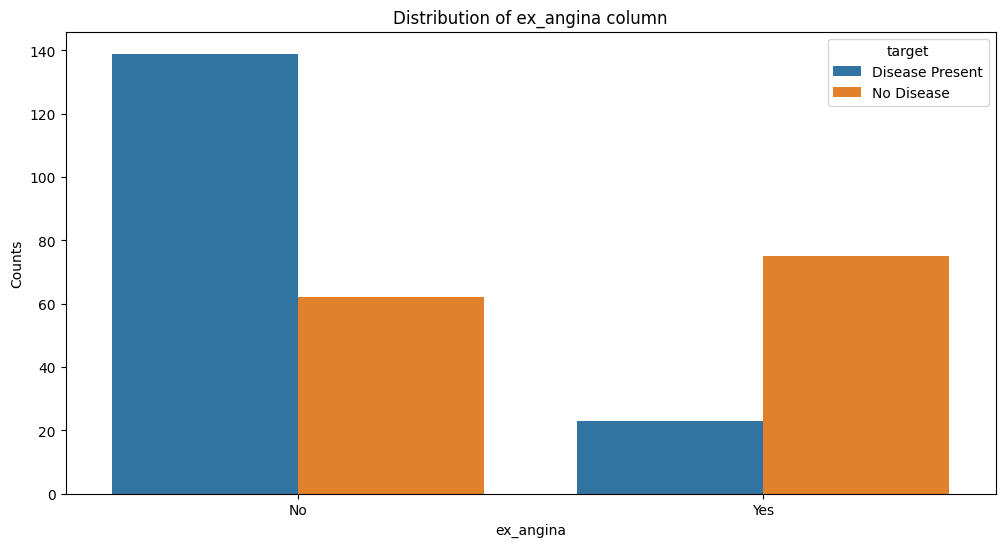

In [75]:
plot_distribution('ex_angina', hue='target', counts=False)

- DownSloping People tend to be more likely to be Disease Present.

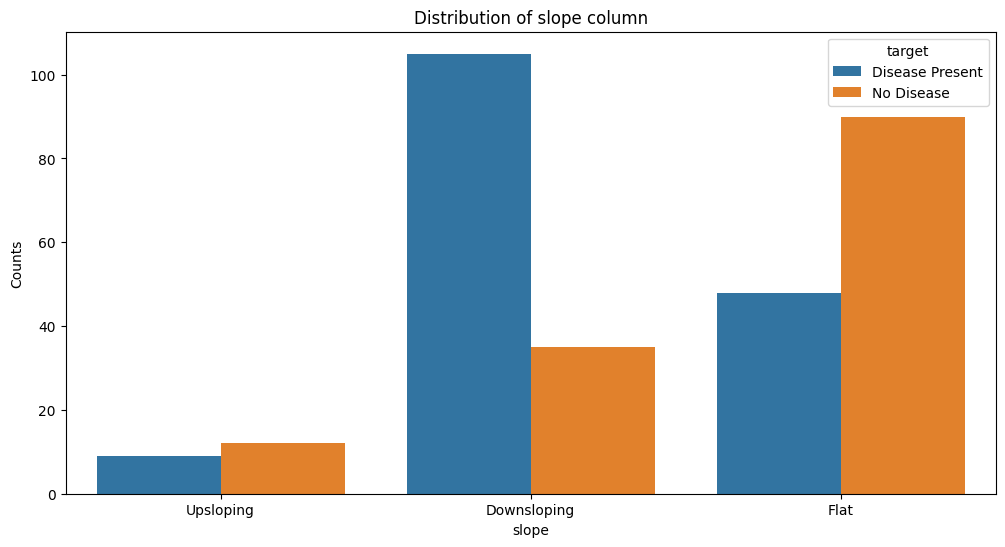

In [76]:
plot_distribution('slope', hue='target', counts=False)

- Seems that there is a Negative correlation between the target and the Colored Vessels columns as when number of colors increase this means less likely to be Disease Present.

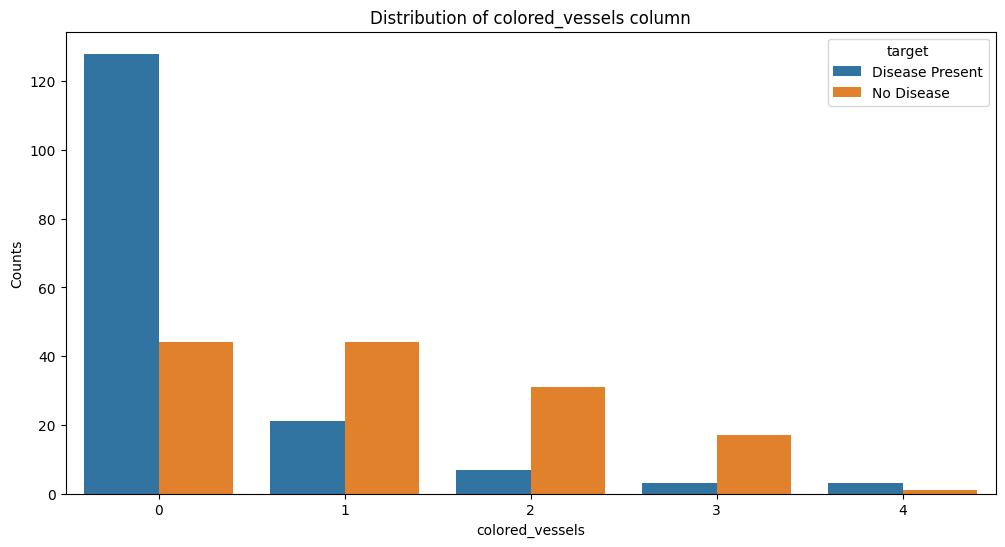

In [77]:
plot_distribution('colored_vessels', hue='target', counts=False)

- Fixed Defect represent more people with Disease Present cases.

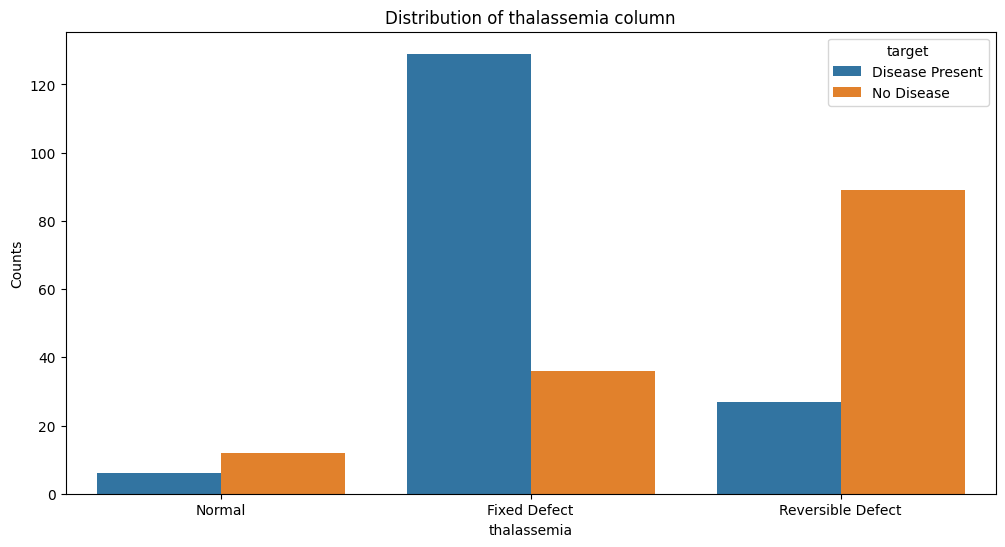

In [78]:
plot_distribution('thalassemia', hue='target', counts=False)

- Old peaple are more likely to be Disease Present.

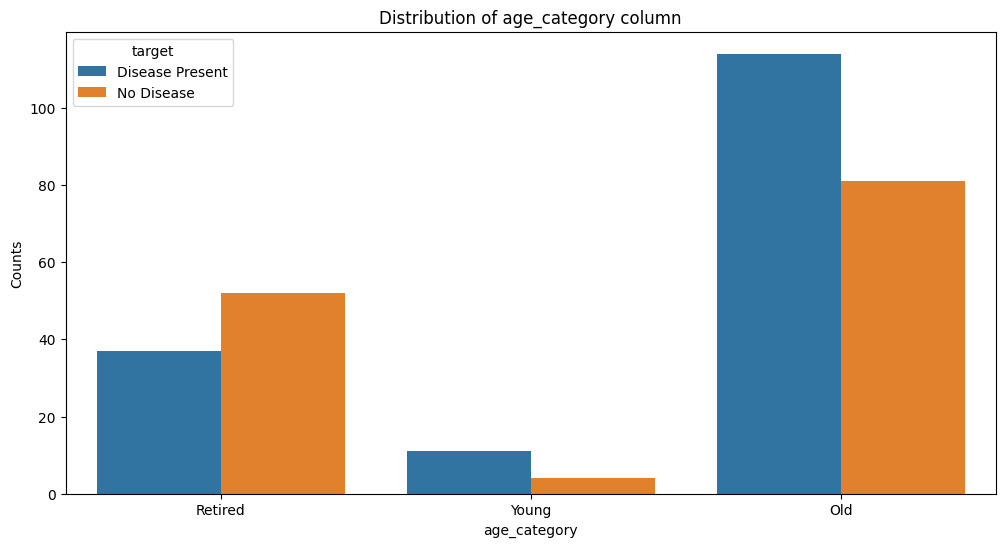

In [79]:
plot_distribution('age_category', hue='target', counts=False)

### Here I will write the most valuable insights form the linear correlation analysis. **Take Care of the P-values as it denys the correlation.**
- Resting Blood Pressure has a positive correlation with age & this correlates positively with a being Disease Present. 
- Cholesterol has a positive Correlation with age & this correlates positively with being a Disease Present.
- ST Depression has a weak positive correlation with age & this correlates positively with being a Disease Present.
- Maximum Heart Rate Achieved during Exercises correlates Negatively with age & this correlates negatively with being a disease present (doing exercieses helps preventing the disease)
- Number of Vessels correlates Positively with age & this correlates weakly positively with being a Disease Present and Moderately Positively with being No-Disease.  (**canceled**)
- ST Depression correlates Negatively with the Maximum Heart Rate Achieved during Exercises.
- ST Depression correlates positively with Colored Vessels & Negatively with Disease and Positively with No-Disease.  (**canceled**)

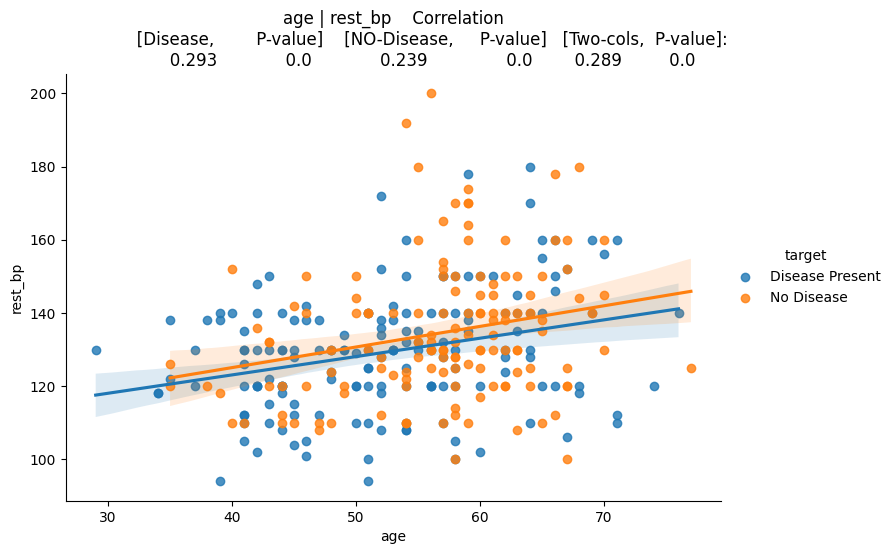

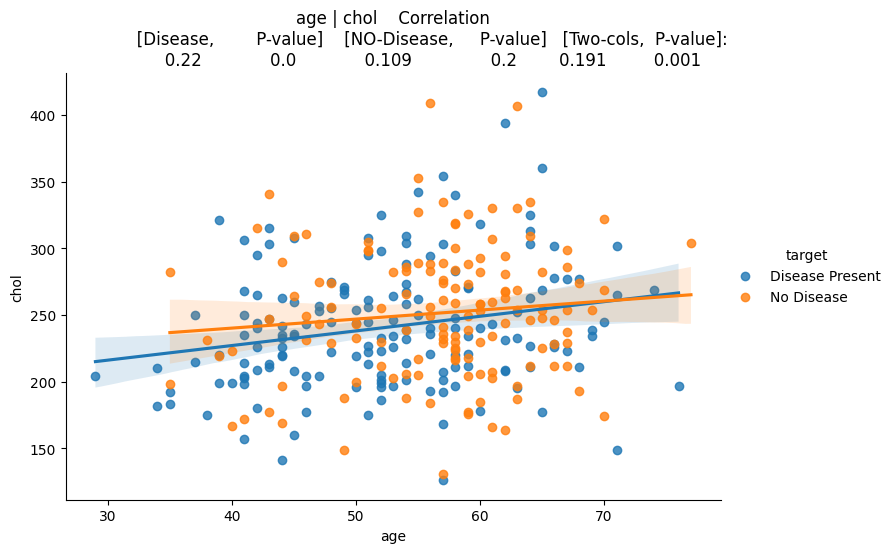

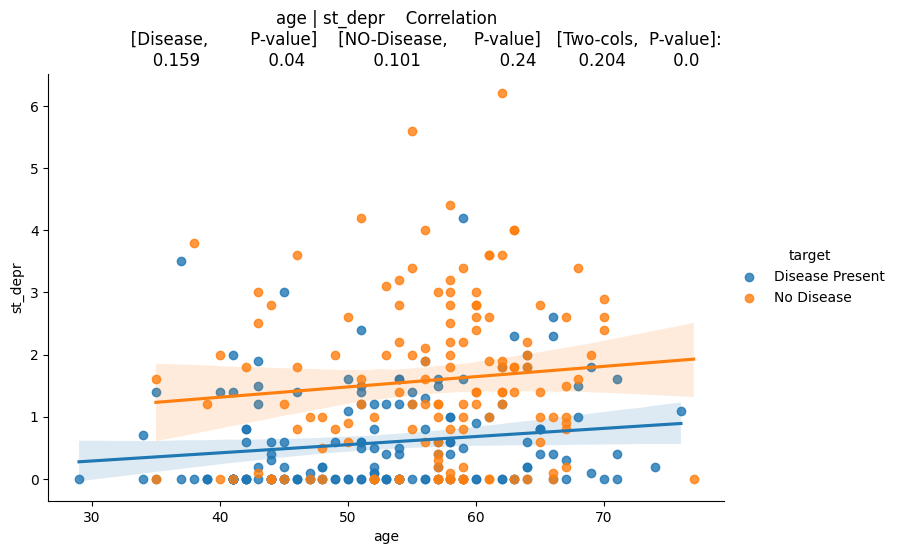

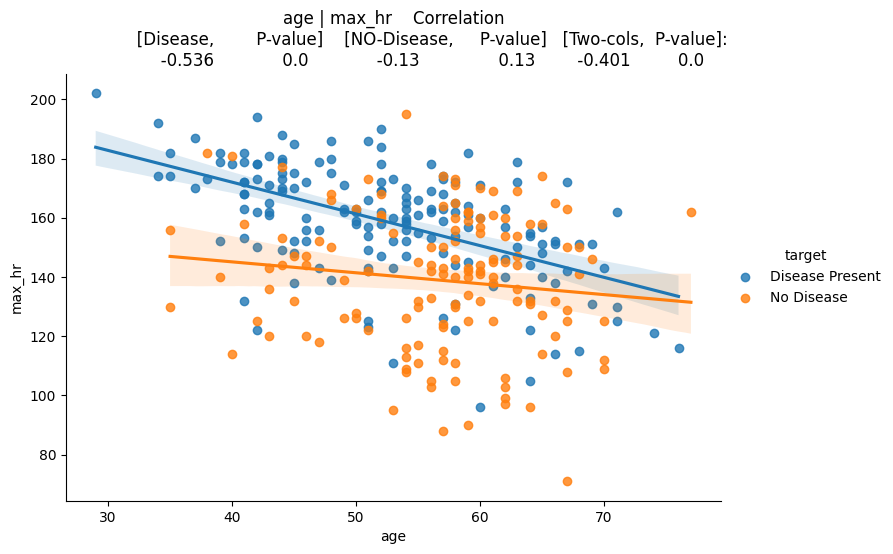

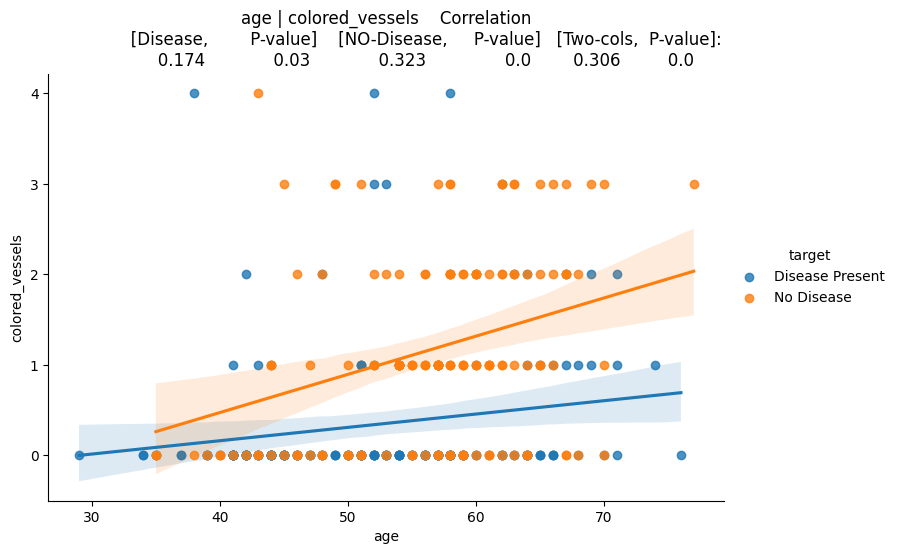

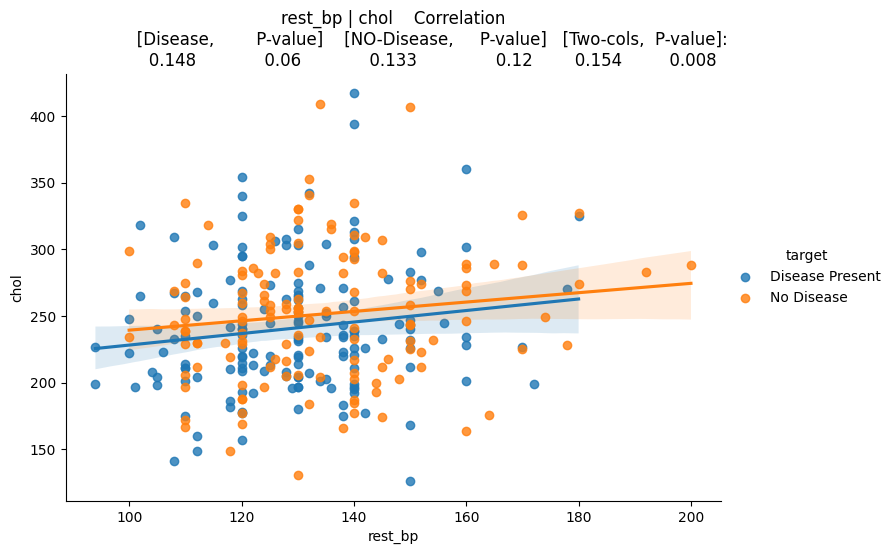

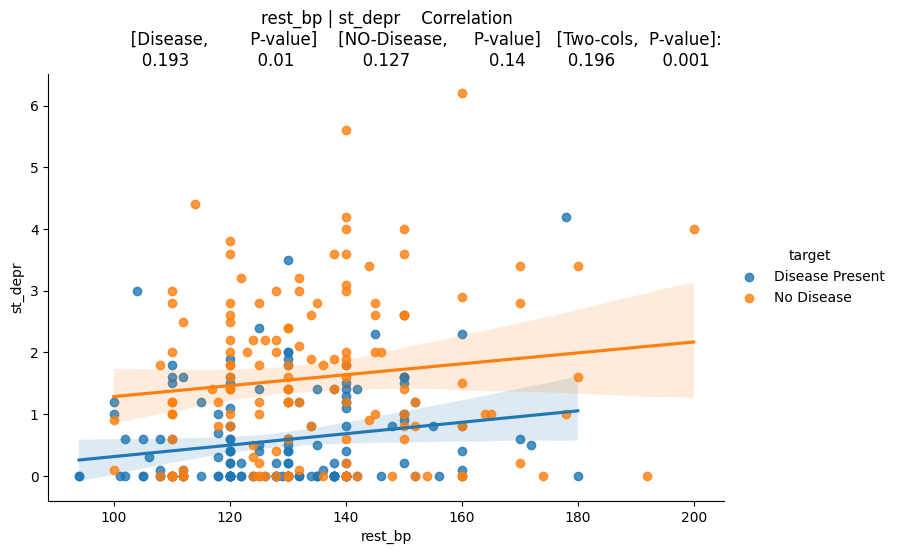

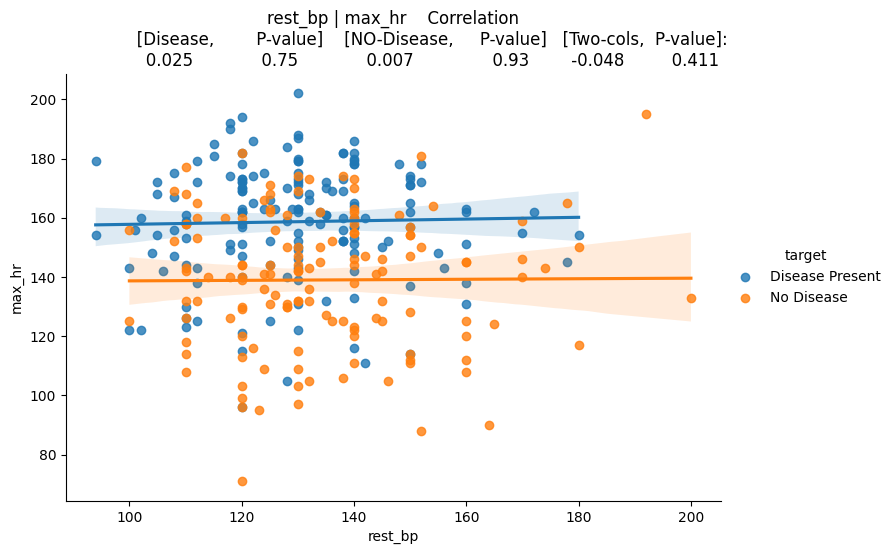

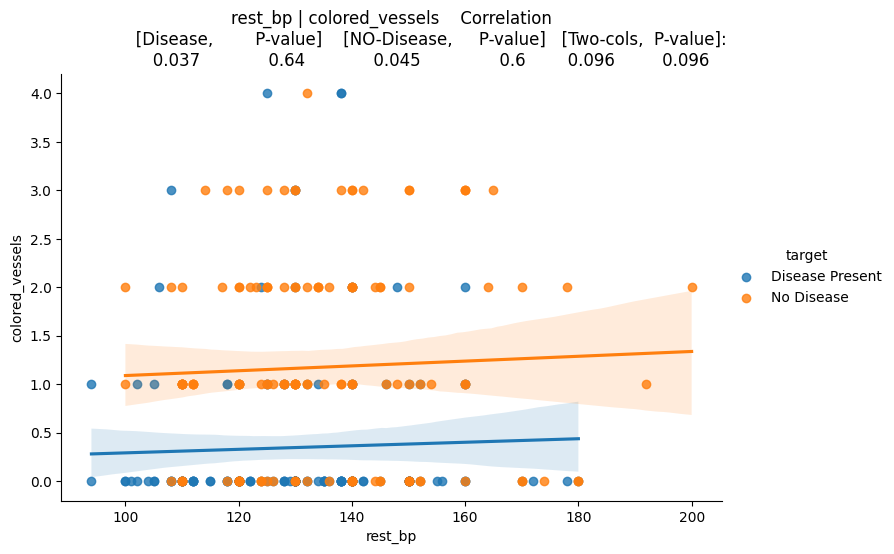

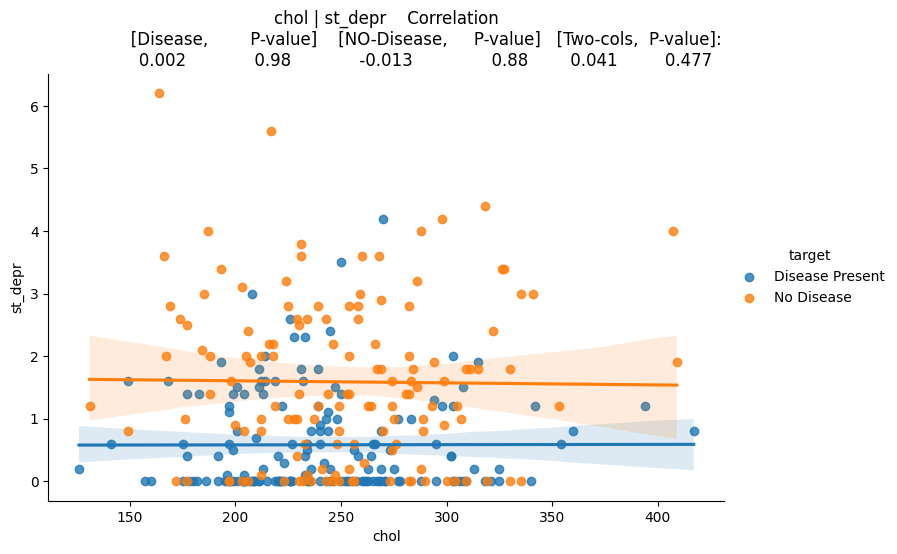

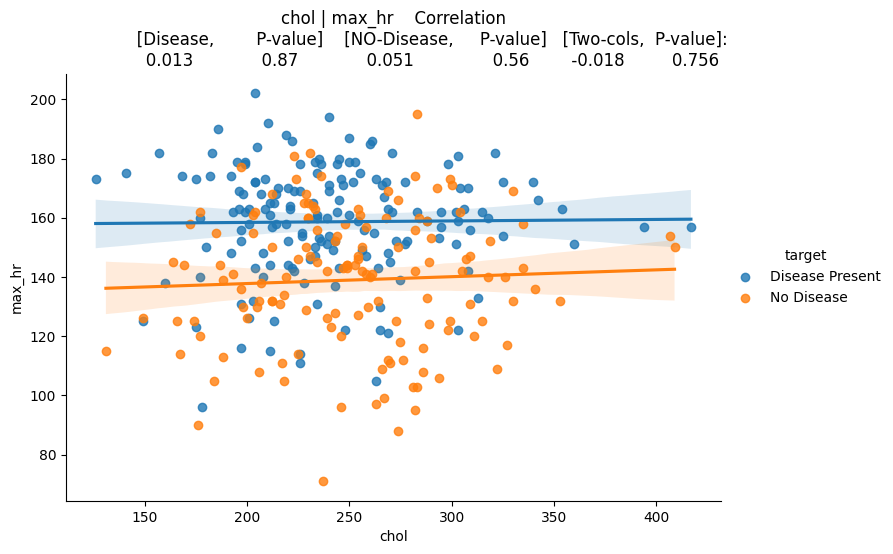

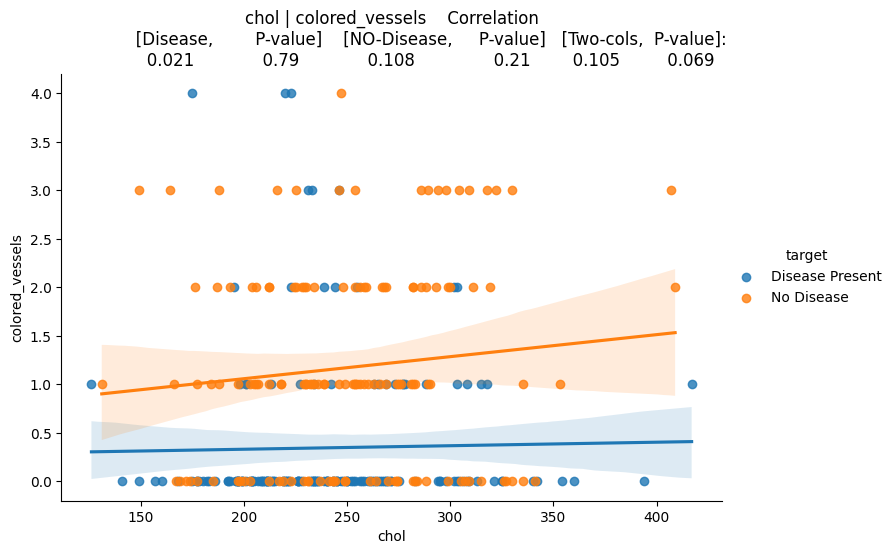

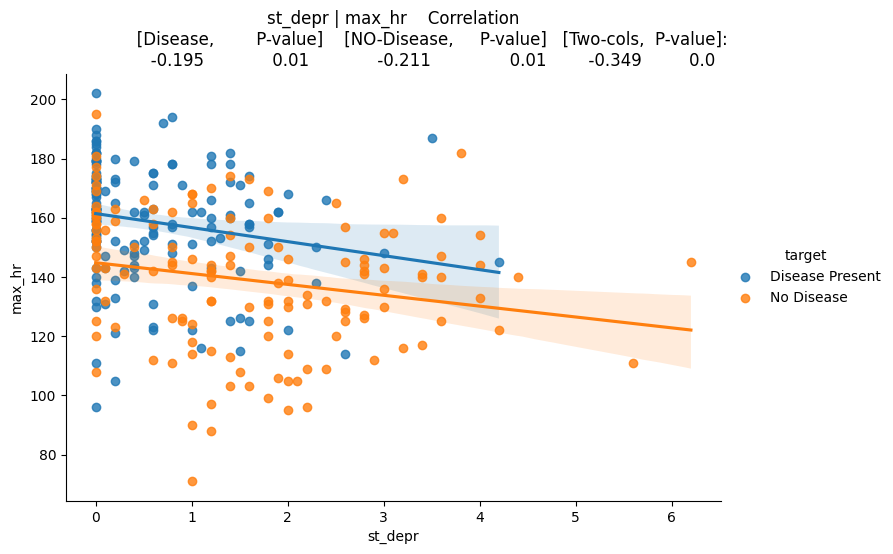

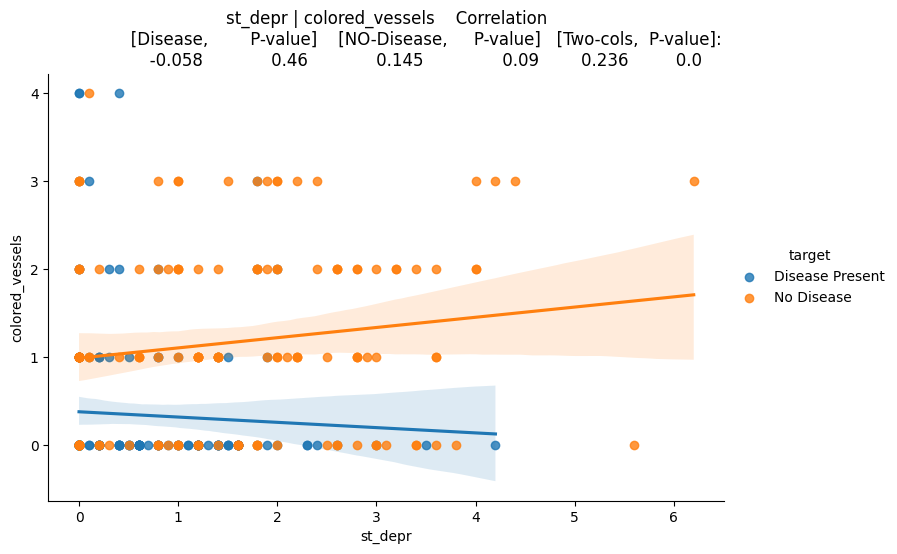

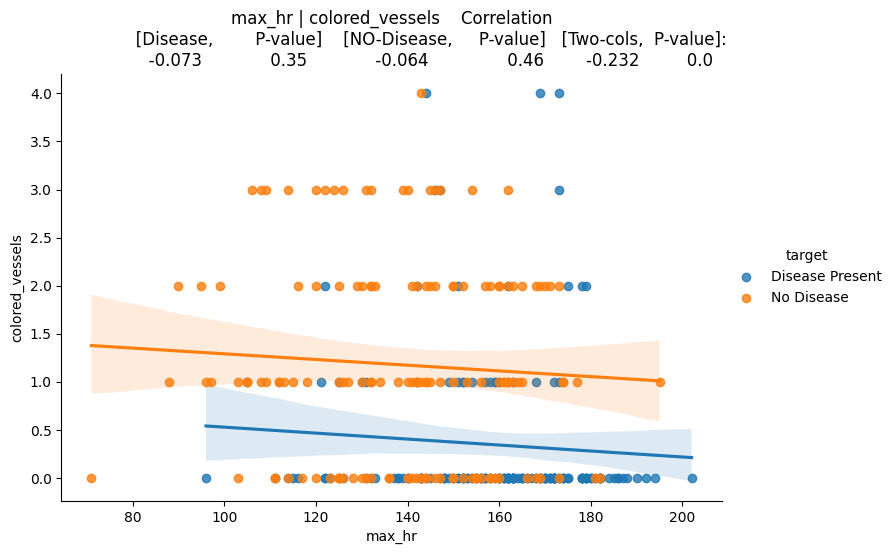

In [80]:
from scipy import stats

cols = ['age', 'rest_bp', 'chol', 'st_depr', 'max_hr', 'colored_vessels']

mask = preprocessed_data['target'] == 'Disease Present'
rev_true = preprocessed_data[mask]
rev_false = preprocessed_data[~mask]

for i, col in enumerate(cols):
    while(i < len(cols)):
        if cols[i] == col:
                i += 1
                continue
        corr_rev_true, p_corr_rev_true = stats.pearsonr(rev_true[col], rev_true[cols[i]])
        corr_rev_false, p_corr_rev_false = stats.pearsonr(rev_false[col], rev_false[cols[i]])
        corr_cols, p_corr_cols = stats.pearsonr(preprocessed_data[col], preprocessed_data[cols[i]])
        
        ax = sns.lmplot(data=preprocessed_data, x=col, y=cols[i], 
                hue='target',
                hue_order=['Disease Present', 'No Disease'],
                height=5,
                aspect=1.5)
        ax.set(title= f"{col} | {cols[i]}    Correlation\n\
               [Disease,        P-value]    [NO-Disease,     P-value]   [Two-cols,  P-value]:\n\
               {np.round(corr_rev_true, 3)}             {np.round(p_corr_rev_true, 2)}\
             {np.round(corr_rev_false, 3)}               {np.round(p_corr_rev_false, 2)}\
        {np.round(corr_cols, 3)}         {np.round(p_corr_cols, 3)}")
        i += 1

        plt.savefig(f'figs/regression correlation {col} AND {[i]} with target as hue.png', format='png')
        plt.show()

- This leads to the same thing we found in the Bivariate analysis, more colored_vessels less eliagible to disease.

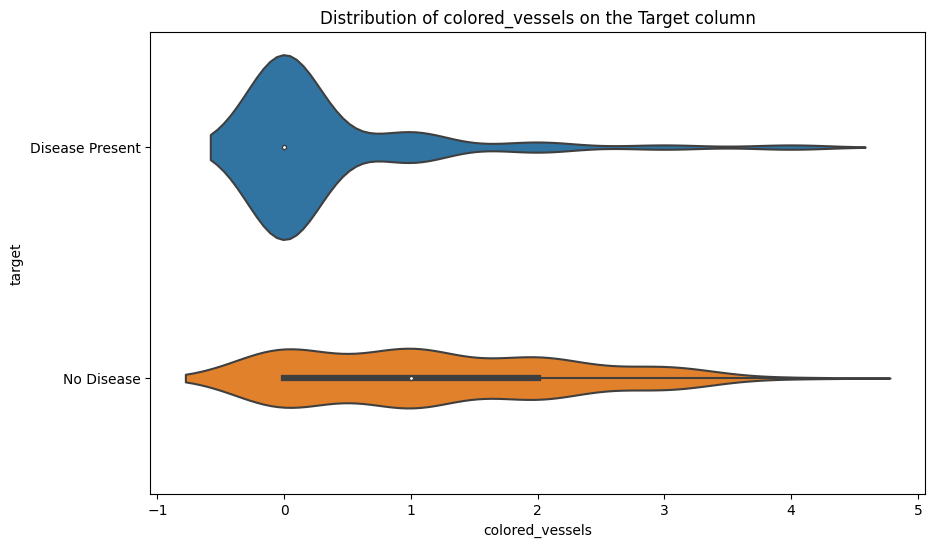

In [81]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=preprocessed_data, 
               x='colored_vessels',
               y='target')
plt.title('Distribution of colored_vessels on the Target column')
plt.savefig('figs/violinplot for colored_vessels on target.png', format='png')

In [82]:
c = pd.read_csv('heart.csv')
c.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64